# Proyecto Final: Integración de 3 o más cuerpos

- Carlos Daniel López Mimenza (**@SirSilverCharles**)
- Daniel Martínez Urrieta (**@danmarurr**)
- María Fernanda Pérez Ramírez (**@FernandaPerez**)

Para el problema de $N$ cuerpos, consideremos las ecuaciones de movimiento para cada una ellas (con la posición $\vec{q}_i$, masa $m_i$), suponiendo que las partículas se encuentran en el mismo plano (2D):

\begin{align}
    m_i \frac{{\rm d}^2\vec{q}_i}{{\rm d}t^2} = \sum_{i \neq j} \frac{Gm_im_j}{||\vec{q}_i - \vec{q}_j||^2}(\vec{q}_i - \vec{q}_j)
\end{align}

## Caso más simple: Tres cuerpos.

Para éste caso, tendremos que las ecuaciones que describen las trayectorias de las partículas son:

\begin{align}
    \ddot{\mathbf{x}}_1 &= - \frac{Gm_2}{(x_1 - x_2)^2}(\mathbf{x}_1 - \mathbf{x}_2) - \frac{Gm_3}{(x_1 - x_3)^2}(\mathbf{x}_1 - \mathbf{x}_3)\\
    \ddot{\mathbf{x}}_2 &= - \frac{Gm_3}{(x_2 - x_3)^2}(\mathbf{x}_2 - \mathbf{x}_3) - \frac{Gm_1}{(x_2 - x_1)^2}(\mathbf{x}_2 - \mathbf{x}_1)\\
    \ddot{\mathbf{x}}_3 &= - \frac{Gm_1}{(x_3 - x_1)^2}(\mathbf{x}_3 - \mathbf{x}_1) - \frac{Gm_2}{(x_3 - x_2)^2}(\mathbf{x}_3 - \mathbf{x}_2)
\end{align}

Para tomar sólo ecuaciones de primer orden (y así usar Taylor) implementamos además que:
\begin{align}
    \dot{\mathbf{v}}_j = \ddot{\mathbf{x}}_j \ \ \Rightarrow \dot{\mathbf{x}}_j = \mathbf{v}_j
\end{align}

In [1]:
using TaylorSeries
using PyPlot
using PyCall
@pyimport matplotlib.animation as anim

In [24]:
function anima3C(c1,c2,c3, nombre::ASCIIString)
    px1 = [x[1] for x in c1[1]]
    px2 = [x[1] for x in c2[1]]
    px3 = [x[1] for x in c3[1]]
    py1 = [x[2] for x in c1[1]]
    py2 = [x[2] for x in c2[1]]
    py3 = [x[2] for x in c3[1]]
    
    
    fig = figure(figsize=(5,5))
    cuadros = [[plot(px1[i],py1[i], ",", px2[i],py2[i],  ",", px3[i],py3[i], marker = "*", color ="r")] for i=1:length(px1)]
    
    animacion = anim.ArtistAnimation(fig, cuadros, interval=200, blit=true) 
    animacion[:save](nombre*".mp4", extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"])
end

function muestra_animacion(nombre::ASCIIString)
    display("text/html", string("""<video autoplay controls><source src="data:video/x-m4v;base64,""",base64(open(readbytes,nombre*".mp4")),"""" type="video/mp4"></video>"""))
end

muestra_animacion (generic function with 1 method)

In [3]:
x = Taylor1([1])

 1 + 𝒪(t¹)

In [4]:
x.order

0

In [5]:
eps(1.)

2.220446049250313e-16

In [6]:
#Agrego Línea para instalar modulo de Taylor (cortesia de Luis)
#Pkg.add("TaylorSeries")

In [7]:
const epsilon = 1.0e-20
const G = 1

function paso_int{T<:Real}(x_0::Taylor1{T})
    orden = x_0.order
    h1 = (epsilon/abs(x_0.coeffs[orden + 1]))^(1/orden) 
    h2 = (epsilon/abs(x_0.coeffs[orden]))^(1/(orden - 1))
    min(h1, h2)
end

function Horner{T<:Real, S<:Real}(x_0::Taylor1{S}, h::T)
    n = x_0.order
    suma = zeros(n)
    suma[1] = x_0.coeffs[n]
    for j in 2:n
        suma[j] = x_0.coeffs[n + 1 - j] + h*suma[j - 1]
    end
    suma[n]
end

Horner (generic function with 1 method)

In [8]:
function Integrador_1(pos_iniciales, vel_ini, masas::Array{Float64,1}, t0::Float64, tf::Float64, p::Int)
    #Para ahorrar al momento de escribir los nombres se indicarán así: pi donde i es el número de cuerpo,
    # y p inidica si es posición o velocidad
    #Creamos los arreglos con los tiempos y las soluciones
    v1 = typeof(vel_ini[1])[vel_ini[1]]
    v2 = typeof(vel_ini[2])[vel_ini[2]]
    v3 = typeof(vel_ini[3])[vel_ini[3]]
    p1 = typeof(pos_iniciales[1])[pos_iniciales[1]]
    p2 = typeof(pos_iniciales[2])[pos_iniciales[2]]
    p3 = typeof(pos_iniciales[3])[pos_iniciales[3]]
    ts = Float64[t0] #arreglo inicial para los tiempos
    
    m1 = masas[1]
    m2 = masas[2]
    m3 = masas[3]
    
    t = t0
    h = 1
    
    while t <= tf && h > 1e-8
        #Creo arreglos de cada parámetro
        arr_x1 = Float64[p1[end][1]]
        arr_x2 = Float64[p2[end][1]]
        arr_x3 = Float64[p3[end][1]]
        arr_y1 = Float64[p1[end][2]]
        arr_y2 = Float64[p2[end][2]]
        arr_y3 = Float64[p3[end][2]]
        arr_z1 = Float64[p1[end][3]]
        arr_z2 = Float64[p2[end][3]]
        arr_z3 = Float64[p3[end][3]]
        arr_vx1 = Float64[v1[end][1]]
        arr_vx2 = Float64[v2[end][1]]
        arr_vx3 = Float64[v3[end][1]]
        arr_vy1 = Float64[v1[end][2]]
        arr_vy2 = Float64[v2[end][2]]
        arr_vy3 = Float64[v3[end][2]]
        arr_vz1 = Float64[p1[end][3]]
        arr_vz2 = Float64[p2[end][3]]
        arr_vz3 = Float64[p3[end][3]]
        
        #Creo Taylor's para cada parámetro
        for j in 1:p
            Taylor_arr_x1 = Taylor1(arr_x1)
            Taylor_arr_x2 = Taylor1(arr_x2)
            Taylor_arr_x3 = Taylor1(arr_x3)
            Taylor_arr_y1 = Taylor1(arr_y1)
            Taylor_arr_y2 = Taylor1(arr_y2)
            Taylor_arr_y3 = Taylor1(arr_y3)
            Taylor_arr_z1 = Taylor1(arr_z1)
            Taylor_arr_z2 = Taylor1(arr_z2)
            Taylor_arr_z3 = Taylor1(arr_z3)
            Taylor_arr_vx1 = Taylor1(arr_vx1)
            Taylor_arr_vx2 = Taylor1(arr_vx2)
            Taylor_arr_vx3 = Taylor1(arr_vx3)
            Taylor_arr_vy1 = Taylor1(arr_vy1)
            Taylor_arr_vy2 = Taylor1(arr_vy2)
            Taylor_arr_vy3 = Taylor1(arr_vy3)
            Taylor_arr_vz1 = Taylor1(arr_vz1)
            Taylor_arr_vz2 = Taylor1(arr_vz2)
            Taylor_arr_vz3 = Taylor1(arr_vz3)
            
            #@show Taylor_arr_x1          
            ##Definimos la operación de las 6 ecs de movimiento.
            
            
r12 = ((Taylor_arr_x1 - Taylor_arr_x2)^2 + (Taylor_arr_y1 - Taylor_arr_y2)^2 + (Taylor_arr_z1 - Taylor_arr_z2)^2)^(1/2)
r13 = ((Taylor_arr_x1 - Taylor_arr_x3)^2 + (Taylor_arr_y1 - Taylor_arr_y3)^2 + (Taylor_arr_z1 - Taylor_arr_z3)^2)^(1/2)
r23 = ((Taylor_arr_x2 - Taylor_arr_x3)^2 + (Taylor_arr_y2 - Taylor_arr_y3)^2 + (Taylor_arr_z2 - Taylor_arr_z3)^2)^(1/2)
            
            #@show r12, r3, r23       
            
            #Para el cuerpo 1
            fx1 = -G*(m2*(Taylor_arr_x1 - Taylor_arr_x2)/(r12)^2 + m3*(Taylor_arr_x1 - Taylor_arr_x3)/(r13)^2)
            fy1 = -G*(m2*(Taylor_arr_y1 - Taylor_arr_y2)/(r12)^2 + m3*(Taylor_arr_y1 - Taylor_arr_y3)/(r13)^2)
            fz1 = -G*(m2*(Taylor_arr_z1 - Taylor_arr_z2)/(r12)^2 + m3*(Taylor_arr_z1 - Taylor_arr_z3)/(r13)^2)
            #Para el cuerpo 2
            fx2 = -G*(m3*(Taylor_arr_x2 - Taylor_arr_x3)/(r23)^2 + m1*(Taylor_arr_x2 - Taylor_arr_x1)/(r12)^2)
            fy2 = -G*(m3*(Taylor_arr_y2 - Taylor_arr_y3)/(r23)^2 + m1*(Taylor_arr_y2 - Taylor_arr_y1)/(r12)^2)
            fz2 = -G*(m3*(Taylor_arr_z2 - Taylor_arr_z3)/(r23)^2 + m1*(Taylor_arr_z2 - Taylor_arr_z1)/(r12)^2)
            #Para el cuerpo 3
            fx3 = -G*(m1*(Taylor_arr_x3 - Taylor_arr_x1)/(r13)^2 + m2*(Taylor_arr_x3 - Taylor_arr_x2)/(r23)^2)
            fy3 = -G*(m1*(Taylor_arr_y3 - Taylor_arr_y1)/(r13)^2 + m2*(Taylor_arr_y3 - Taylor_arr_y2)/(r23)^2)
            fz3 = -G*(m1*(Taylor_arr_z3 - Taylor_arr_z1)/(r13)^2 + m2*(Taylor_arr_z3 - Taylor_arr_z2)/(r23)^2)
            
            #Incluimos los nuevos coeficientes
            arr_x1 = push!(arr_x1, Taylor_arr_vx1.coeffs[j]/j)
            arr_x2 = push!(arr_x2, Taylor_arr_vx2.coeffs[j]/j)
            arr_x3 = push!(arr_x3, Taylor_arr_vx3.coeffs[j]/j)
            arr_y1 = push!(arr_y1, Taylor_arr_vy1.coeffs[j]/j)
            arr_y2 = push!(arr_y2, Taylor_arr_vy2.coeffs[j]/j)
            arr_y3 = push!(arr_y3, Taylor_arr_vy3.coeffs[j]/j)
            arr_z1 = push!(arr_z1, Taylor_arr_vz1.coeffs[j]/j)
            arr_z2 = push!(arr_z2, Taylor_arr_vz2.coeffs[j]/j)
            arr_z3 = push!(arr_z3, Taylor_arr_vz3.coeffs[j]/j)
            arr_vx1 =push!(arr_vx1, fx1.coeffs[j]/j)
            arr_vx2 =push!(arr_vx2, fx2.coeffs[j]/j)
            arr_vx3 =push!(arr_vx3, fx3.coeffs[j]/j)
            arr_vy1 =push!(arr_vy1, fy1.coeffs[j]/j)
            arr_vy2 =push!(arr_vy2, fy2.coeffs[j]/j)
            arr_vy3 =push!(arr_vy3, fy3.coeffs[j]/j)
            arr_vz1 =push!(arr_vz1, fz1.coeffs[j]/j)
            arr_vz2 =push!(arr_vz2, fz2.coeffs[j]/j)
            arr_vz3 =push!(arr_vz3, fz3.coeffs[j]/j)
        end
        #Hacemos Taylor de todos los arreglos finales
        Taylor_arr_x1 = Taylor1(arr_x1)
        Taylor_arr_x2 = Taylor1(arr_x2)
        Taylor_arr_x3 = Taylor1(arr_x3)
        Taylor_arr_y1 = Taylor1(arr_y1)
        Taylor_arr_y2 = Taylor1(arr_y2)
        Taylor_arr_y3 = Taylor1(arr_y3)
        Taylor_arr_z1 = Taylor1(arr_z1)
        Taylor_arr_z2 = Taylor1(arr_z2)
        Taylor_arr_z3 = Taylor1(arr_z3)
        Taylor_arr_vx1 = Taylor1(arr_vx1)
        Taylor_arr_vx2 = Taylor1(arr_vx2)
        Taylor_arr_vx3 = Taylor1(arr_vx3)
        Taylor_arr_vy1 = Taylor1(arr_vy1)
        Taylor_arr_vy2 = Taylor1(arr_vy2)
        Taylor_arr_vy3 = Taylor1(arr_vy3)
        Taylor_arr_vz1 = Taylor1(arr_vz1)
        Taylor_arr_vz2 = Taylor1(arr_vz2)
        Taylor_arr_vz3 = Taylor1(arr_vz3)

        
        #Calculamos todas las h's posibles        
        h1 = paso_int(Taylor_arr_x1)
        h2 = paso_int(Taylor_arr_x2)
        h3 = paso_int(Taylor_arr_x3)
        h4 = paso_int(Taylor_arr_y1)
        h5 = paso_int(Taylor_arr_y2)
        h6 = paso_int(Taylor_arr_z3)
        h7 = paso_int(Taylor_arr_z1)
        h8 = paso_int(Taylor_arr_z2)
        h9 = paso_int(Taylor_arr_y3)
        h10 = paso_int(Taylor_arr_vx1)
        h11 = paso_int(Taylor_arr_vx2)
        h12 = paso_int(Taylor_arr_vx3)
        h13 = paso_int(Taylor_arr_vz1)
        h14 = paso_int(Taylor_arr_vz2)
        h15 = paso_int(Taylor_arr_vz3)
        
        
        #Elegimos el h más pequeño
        h = min(h1, h2, h3, h4, h5, h6, h7, h8, h9, h10, h11, h12, h13, h14, h15)
        t += h
        #Calculamos el siguiente paso usando Horner
        x1 = evaluate(Taylor_arr_x1, h)
        x2 = evaluate(Taylor_arr_x2, h)
        x3 = evaluate(Taylor_arr_x3, h)
        y1 = evaluate(Taylor_arr_y1, h)
        y2 = evaluate(Taylor_arr_y2, h)
        y3 = evaluate(Taylor_arr_y3, h)
        z1 = evaluate(Taylor_arr_z1, h)
        z2 = evaluate(Taylor_arr_z2, h)
        z3 = evaluate(Taylor_arr_z3, h)
        vx1 = evaluate(Taylor_arr_vx1, h)
        vx2 = evaluate(Taylor_arr_vx2, h)
        vx3 = evaluate(Taylor_arr_vx3, h)
        vy1 = evaluate(Taylor_arr_vy1, h)
        vy2 = evaluate(Taylor_arr_vy2, h)
        vy3 = evaluate(Taylor_arr_vy3, h)
        vz1 = evaluate(Taylor_arr_vz1, h)
        vz2 = evaluate(Taylor_arr_vz2, h)
        vz3 = evaluate(Taylor_arr_vz3, h)
        
        #Revisamos que no salgan singularidades
        
        
        #Creamos vectores para la posicion y la velocidad de cada cuerpo
        p1_temp = Float64[x1, y1, z1]
        p2_temp = Float64[x2, y2, z2]
        p3_temp = Float64[x3, y3, z3]
        v1_temp = Float64[vx1, vy1, vz1]
        v2_temp = Float64[vx2, vy2, vz2]
        v3_temp = Float64[vx3, vy3, vz3]
        
        #Agregamos nueva información de tiempos, posiciones y velocidades
        p1 = push!(p1, p1_temp)
        p2 = push!(p2, p2_temp)
        p3 = push!(p3, p3_temp)
        v1 = push!(v1, v1_temp)
        v2 = push!(v2, v2_temp)
        v3 = push!(v3, v3_temp)
        ts = push!(ts, t)
    end
    #Creamos arreglos con toda la información de los cuerpos
    cuerpo1 = typeof(p1)[p1, v1]
    cuerpo2 = typeof(p2)[p2, v2]
    cuerpo3 = typeof(p3)[p3, v3]
    
    ts, cuerpo1, cuerpo2, cuerpo3
end

Integrador_1 (generic function with 1 method)

In [9]:
function Energia_3(c1, c2, c3, masas)
    #Extraemos la información de posiciones y velocidades
    vc1 = c1[2]
    vc2 = c2[2]
    vc3 = c3[2]
    pc1 = c1[1]
    pc2 = c2[1]
    pc3 = c3[1]
    #Obtenemos el valor de las masas
    m1 = masas[1]
    m2 = masas[2]
    m3 = masas[3]
    
    ϵ = zeros(length(vc1))
    for j in 1:length(ϵ)
        ϵ1 = m1*(0.5*norm(vc1[j])^2 - m2/norm(pc2[j] - pc1[j]) - m3/norm(pc3[j] - pc1[j]))
        ϵ2 = m2*(0.5*norm(vc2[j])^2 - m1/norm(pc1[j] - pc2[j]) - m3/norm(pc3[j] - pc2[j]))
        ϵ3 = m3*(0.5*norm(vc3[j])^2 - m2/norm(pc2[j] - pc3[j]) - m1/norm(pc1[j] - pc3[j]))
        ϵ[j] = ϵ1 + ϵ2 + ϵ3
    end
    ϵ
end

Energia_3 (generic function with 1 method)

In [10]:
#Primera configuración de cuerpos:
prueba1_masas = [1., 1., 1.]
prueba1_p1 = [1.0, 0.0,0.]
prueba1_p2 = [-0.5,sqrt(3)/2,0.]
prueba1_p3 = [-0.5,-sqrt(3)/2,0.]
prueba1_v1 = [0.,-1.,0.]
prueba1_v2 = [sqrt(3)/2, 0.5,0.]
prueba1_v3 = [-sqrt(3)/2, 0.5,0.]
prueba1_pos = typeof(prueba1_p1)[prueba1_p1, prueba1_p2, prueba1_p3]
prueba1_vel = typeof(prueba1_v1)[prueba1_v1, prueba1_v2, prueba1_v3];

In [11]:
prueba2_masas = [200., 1., 0.001]
prueba2_p1 = [0.0, 0.0,0.]
prueba2_p2 = [1.42,0.,0.]
prueba2_p3 = [1.66,0.,0.]
prueba2_v1 = [0.,0.,0.]
prueba2_v2 = [0.,10.,0.]
prueba2_v3 = [0.,7.,0.]
prueba2_pos = typeof(prueba2_p1)[prueba2_p1, prueba2_p2, prueba2_p3]
prueba2_vel = typeof(prueba2_v1)[prueba2_v1, prueba2_v2, prueba2_v3];

In [12]:
ts1, c11, c21, c31 = Integrador_1(prueba1_pos, prueba1_vel, prueba1_masas, 0., 100., 28);
@time ts1, c11, c21, c31 = Integrador_1(prueba1_pos, prueba1_vel, prueba1_masas, 0., 100., 28);

  0.033061 seconds (455.38 k allocations: 39.841 MB, 15.42% gc time)


In [13]:
norm(c11[1][2])^2

0.9999999999999996

In [14]:
Energia_3(c11, c21, c31, prueba1_masas)

52-element Array{Float64,1}:
 -1.9641
 -1.9641
 -1.9641
 -1.9641
 -1.9641
 -1.9641
 -1.9641
 -1.9641
 -1.9641
 -1.9641
 -1.9641
 -1.9641
 -1.9641
  ⋮     
 -1.9641
 -1.9641
 -1.9641
 -1.9641
 -1.9641
 -1.9641
 -1.9641
 -1.9641
 -1.9641
 -1.9641
 -1.9641
 -1.9641

In [15]:
pos_1 = c11[1]
x_1 = [j[1] for j in pos_1]
y_1 = [j[2] for j in pos_1]
pos_2 = c21[1]
x_2 = [j[1] for j in pos_2]
y_2 = [j[2] for j in pos_2]
pos_3 = c31[1]
x_3 = [j[1] for j in pos_3]
y_3 = [j[2] for j in pos_3];

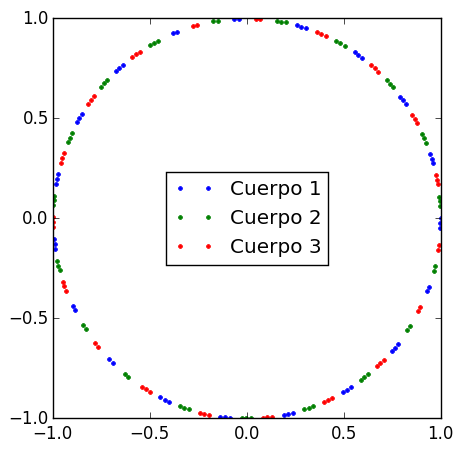

In [16]:
figure(figsize=(5,5))
plot(x_1,y_1, marker = ".", linestyle ="", label ="Cuerpo 1")
plot(x_2,y_2, marker = ".", linestyle ="", label ="Cuerpo 2")
plot(x_3,y_3, marker = ".", linestyle ="", label ="Cuerpo 3")
legend(loc="auto")
show()

In [17]:
ts2, c12, c22, c32 = Integrador_1(prueba2_pos, prueba2_vel, prueba2_masas, 0., 1., 28)
pos_1b = c12[1]
x_1b = [j[1] for j in pos_1b]
y_1b = [j[2] for j in pos_1b]
pos_2b = c22[1]
x_2b = [j[1] for j in pos_2b]
y_2b = [j[2] for j in pos_2b]
pos_3b = c32[1]
x_3b = [j[1] for j in pos_3b]
y_3b = [j[2] for j in pos_3b];

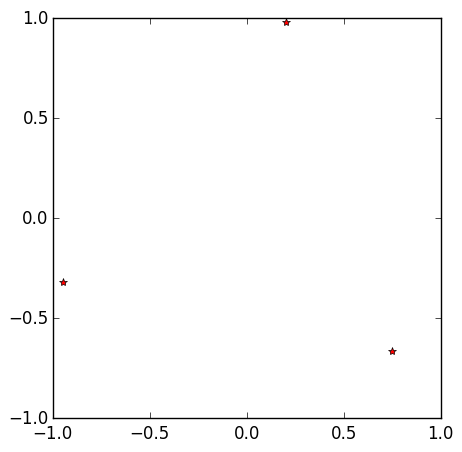

In [26]:
anima3C(c11,c21,c31, "Prueba1");

In [23]:
muestra_animacion("Prueba1")

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAAR+ttZGF0AAACrQYF//+p3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0OCByMjY0MyA1YzY1NzA0IC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNSAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTYgbG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAA16ZYiEABT//vfHT8Cm6Plmy51FPSEwitj6SCi9WOzQMnUAAAMAAAMADGj5q+cbg4CsoYAABKDF/qwrFP4AESEfGif6DkTDwAo0KAdeOLe5UFDiTaejTVbjlfQGSMk5WF1WAHmqg2Ieinlq50f/zMZzg+zLkAfxK+8ia4AAz8UkcejJZLv9wmHxAb6UtjRB5dS3ez21N2TuGlfZ8DjV3lfphnzLzsSJ1Kd0ABj+kdycn8Gmw1JpyXoYTFoDs6NnwU0fchIQrdTu2jpLY6qQcwoi89egja6k28wceqlgaMp3ZB1/RBepcj58L8YX1vp1L1tgyGkutPxzHDNP7c8wnBZb0lwicMHRQH1PZAVY6HbuN4A6DPnUJZ+S/zQR4ItrQToYx/20+dxj/vhUj7q89rhULDMCuWtAUV+dGmr0tsSaw15pXjd9v+zaIAhYkNJGTF8HWjMNKTnrE94gLHoC7bj5BAYGc76U1v0sT/7QyriJ+nzInMZbAZZ8zY62FO3GHe/fBXlebOkoX9AdKLdZ9S7EnBoe4vse4wtdrQ7G8xui+z+CyOtFJatja/IprEoOnaH6eXwMc52zNOUnQ2lx+gWy2uBBzAqczSs5cEBOCe4NVD78RR2953na7Q2DiaOnOabf2nZmgtbdoS72/G9hTKiXnROxJ7IYn5fjXzHzvxv2n5evmHb7RWCWv+7mPG0/J4rTX1bweDSt8+ZSBUEsi7cEV0ofqNnh3lMlqLCnwKiz9SiWDDAdSkV0ShlAAD3PcJVKhhECyT5D9UhPsZ5V2gCRyVLaP4sya+Cn1jEEU3leyMKOAzrTzma8T4p3oz7NC5+y/G54/Cvv8q2pZGFyDBROyVjUwmrPfnsCSLADvsXv/aSKHEYEHzw/XslOR3MHFxnxT/ghoMqWV6/edX2RGgvj8ESMF1g0klWf6U8VxL+1F5f8Amg7sW/fHQDWP2Vxhx0oxSynmMZq2VIrUSNDm1IBaGAsSSOtvlN6mL5CpLTVGL802yDtSJJ+W5YKJvyA9xKbhLItPwXtrekomTjOKVLqnTh7FqDNSW4mYF5VZ1DgLsnqrRn41Fe5ady6fU+0LQUKMersa2nTo5TPyoKKvuo60BIZk7/GysVHs/fTrW79EXc/eBCthvB+WCg7wCTRCDLhhSr2+X7fiKct2Se00YaQUDQl/7GvVnrkfj8TXyoG1LP5gjM4R1IOjkZf//2/h/iIKBqElfym796Trx8/VTc1FY1YhSPy8cD/7r1XbzSntMATorF7f9S2QW3JkWoOQnBHOFBjablL6VYpeVbMmC9jsrb4BEe8t88J9vsIXGkXj4WTiH0K8Q/k6Suok+MMiRsKgKmGGdEHEK3kew+jz+GPZGdBoDWf8UaoOKXbeWuh0EwkJdUS7c45FRGUGXnu6TtFYZHcyJCWi5f79tcPQRs2c0Di/N9eMC8LM3q/WJLr05Tl1m9awqxA94ySEjxvq3XxiN5N9tZ13t6atxcLs2gpo9yra8+ZGxodhmsbza7p0CVn759pUHq7wQWuV1NHZJBXUonmK644AAovZwAoq4sh7pV+Vi7++4FMPCGAWU2cVuS4BUOAUZUv+Ss1Dwk5EmGxoVlv/ZYlmhDKq5PO3UMDhbEv4eoyc9ZLNAhNjFGnwxuJ+AqOCDpR+d6SUVR8YFQWiBVbIBuMhU4f9+sD0GazM170W7HUO24absotyrrGecf7OkuU7d5v30yl0eWevTsCSZsJYcpyNQsRBuZAhe2eLk5eYH72ttW6qeYkz9oqv5fvnuHbVzEE5KdF67IjGPScnD0iS07Lrq2VeW/FL7Vkw1vtem5sUUVkjmLzoowG6eCP9TeZ0uALIrb3jfkT4raKSeelCcbOpcFEUh4wjPkF/bTXb/RxtN+Uamf+1YkpilmwV/RxIupRyjYYARIhBcWQ71sdRwCquSdqynqEEfsg8yr6V+Qi6gfgRgs6ykOd3AN2Nx8w5u/iZtdwAbORSEWvbmkEPXy58RWbcno7phDybw7ZKr8fMa8gtnNfPRksl5kUyHXTZfJVYssiXGK5dOIhRvygCTJWbXjJ0vxEn40EAyTSm22tlHj9YPV8V5zzoOORr/FJGBlfdEmdr2W2Kt26ibju/CyIiMp34CvkLpq5/V7VhEIBiNtwkbfukRDzNCSgqhQV3wd88o77aOPZctiVtObOp1ERGI58k4I8/vH9PqGBpOtwnkU5/o5W96XRDEQ5EKankVpWro5suLhmw+qIXVlldm4e/WSuKM1Xrrm7VHlQt/wnAEU6vn7UQNa2AFuUJcIUOyKQ3ynEtWhHqoIOAHnxvC/iVLiywOc502+dyT9VXe8+DuwOI+kWpSo4BkT+K1yFW8jiwj5TYS2krzfKKCcs2XQ24reZN8CffuOdMfV2XZ80xR2pbJBH9+CvMC7fQJlasUUIyyQIL8yO/ZzmLeesEVJmUoum5GWGMSslFeXOUHRNa4xo5Imt9tc2RcV/D4dvf2wixXhhDt5/UhLa5gCh9JhgkMiUyJ3uPcyV7nHNj//74SEqs6CiLzyvt09fOZIiMnr/IGq2AtTLrYbbj6+zbqc487W7hoCGaLYwK1fcvungNmqw0unP+P7JOOBXOaXZmGs82SdZqhe0VoM8kC6hRqxKlGdCeZl6tJlyRkC2dDz3D+n82SDuh4PYkib0FXVrRDAaiFZj/GuqKWzpAL8XDlJJsmRnvT/z4ziQMaR5PkhvSsWqlOluP7/WwgsJ6sW1ZzaRa5TTUwDQGrdGJR9bij9JUQ/nP9cg91LM4/7+7T+FAKdITD5OMYB8WrnwO9LDJUFToV4P4hiAx7KNBperAstR4kZfDuoqnW03GWJs6v1sufCZe/aK/ST5pwl2/Afi/BNMdpoLabgw+ufX3w+jgNCgaDTR0aXZFBqh3+kNKbthUZKkKaqs6hZHg/77Oxx2t0nq71ak4b6f0iTWqmTmqpJGwJXe7kqAzKuhfNbNRDqP/+j